In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [2]:
from SHDataset import SHDataset
from utils.utils import *
import matplotlib.lines as mlines
import os
import random

### Robustness to Noise

No noise
Noise config: 0
Noise config: 1
Noise config: 2
Noise config: 3


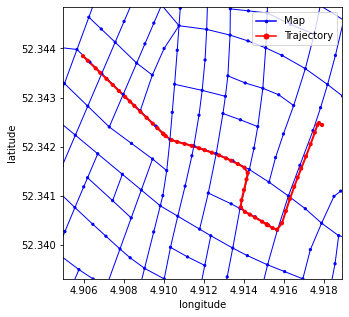

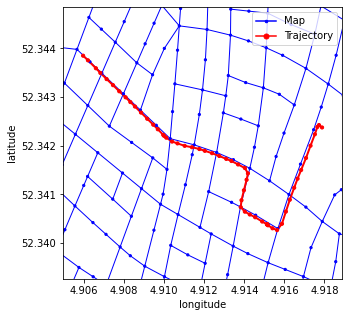

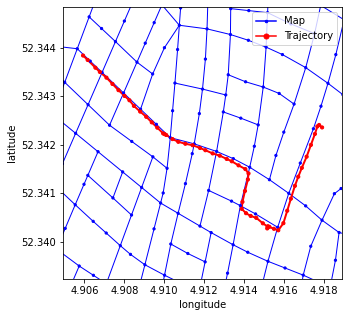

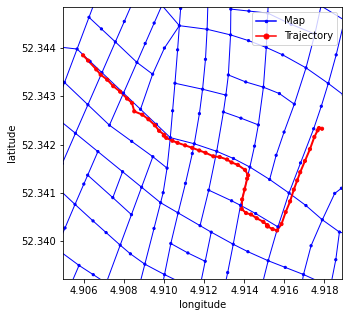

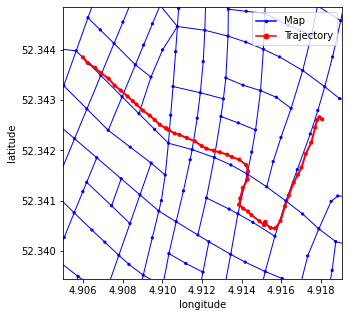

In [4]:
def plot_traj_noise(t_idx=0, figsize=(5,5), savefolder=None):
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0)
    t = T2['T'][t_idx]
    print('No noise')
    if savefolder is None:
        plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
               show_nodes=True, T_edge_width=2.0, T_node_size=10,
                  figsize=figsize)
    else:
        if not os.path.exists(savefolder):
            os.mkdir(savefolder)
        savename = os.path.join(savefolder, 'T_ex_nonoise')
        plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
               show_nodes=True, T_edge_width=2.0, T_node_size=10,
                  figsize=figsize, show_img=False, savename=savename)
    
    for i in range(4):
        print(f'Noise config: {i}')
        dataset = SHDataset(noise=True, noise_config=i)
        G1,T1,G2,T2 = dataset.read_snapshots(0)
        t = T2['T'][t_idx]
        if savefolder is None:
            plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
                       show_nodes=True, T_edge_width=2.0, T_node_size=10,
                      figsize=figsize)
        else:
            savename = os.path.join(savefolder, f'T_ex_noiseconf{i}')
            plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True, 
                       show_nodes=True, T_edge_width=2.0, T_node_size=10,
                      figsize=figsize, show_img=False, savename=savename)

plot_traj_noise(0, savefolder='figures')

### Robustness to Trajectory Sparsity

# of trajectories: 2000
# of trajectories: 4000
# of trajectories: 6000
# of trajectories: 8000
# of trajectories: 10000


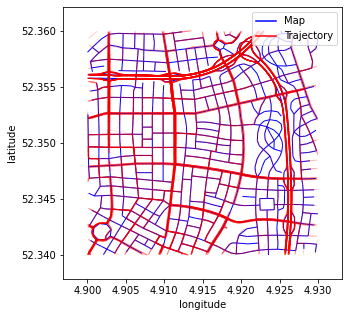

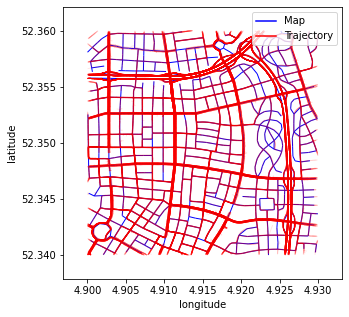

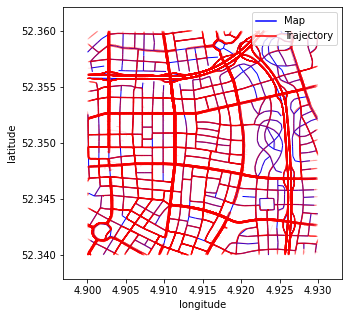

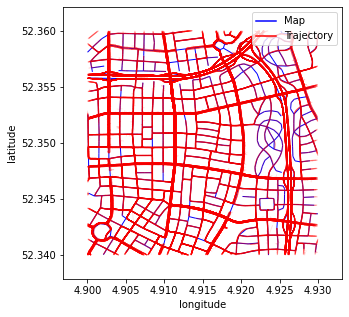

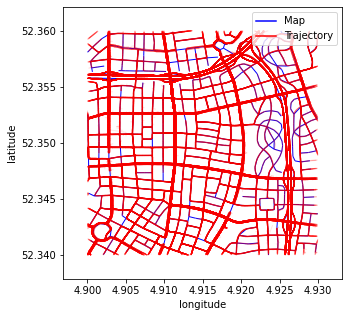

In [5]:

def plot_traj_sparsity(steps=5, total_t2=None, figsize=(5,5), savefolder=None):
    if savefolder is not None and not os.path.exists(savefolder):
        os.mkdir(savefolder)
        
    
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=(52.34,52.36, 4.90, 4.93))
    
    if total_t2 is None:
        total_t2 = len(T2['T'])
    
    n_traj_steps = np.linspace(0, total_t2, steps+1, dtype=np.int64)[1:]
    
    for n_traj in n_traj_steps:
        print(f'# of trajectories: {n_traj}')
        T2_ = random.sample(T2['T'], n_traj)
        if savefolder is None:
            plot_graph(snapshot_to_nxgraph(G1, T2_), figsize=figsize, traj_alpha=0.1)
        else:
            savename = os.path.join(savefolder, f'T_ex_tspars_{n_traj}ts')
            plot_graph(snapshot_to_nxgraph(G1, T2_), figsize=figsize, traj_alpha=0.1,
                      show_img=False, savename=savename)

plot_traj_sparsity(total_t2=10000, savefolder='figures')

### Robustness to Temporal Sparsity

Resampling every 1 points
Resampling every 2 points
Resampling every 3 points
Resampling every 4 points
Resampling every 5 points


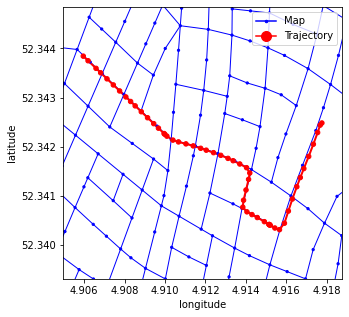

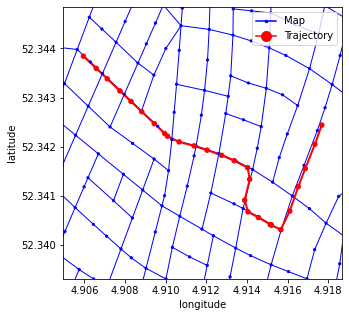

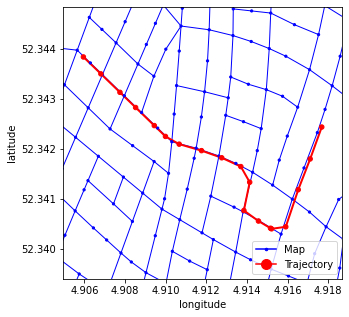

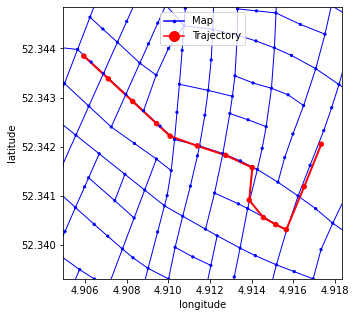

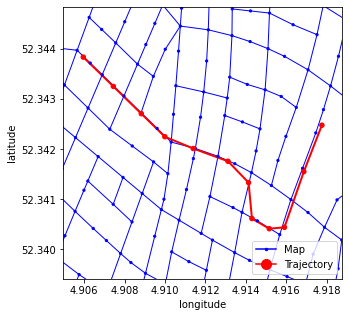

In [6]:
def plot_temp_sparsity(t_idx=0, steps=5, figsize=(5,5), savefolder=None):
    if savefolder is not None and not os.path.exists(savefolder):
        os.mkdir(savefolder)
        
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0)
    t = T2['T'][t_idx]
    
    resample_traj_steps = np.arange(1,steps+1)
    
    for resample_everyn in resample_traj_steps:
        print(f'Resampling every {resample_everyn} points')
        t_ = t[0:-1:resample_everyn]
        if savefolder is None:
            plot_graph(snapshot_to_nxgraph(G1, [t_]), zoom_on_traj=True, 
                       show_nodes=True, T_node_size=20, G_node_size=5, T_edge_width=2.0,
                      figsize=figsize)
        else:
            savename = os.path.join(savefolder, f'T_ex_resample_every{resample_everyn}')
            plot_graph(snapshot_to_nxgraph(G1, [t_]), zoom_on_traj=True, 
                       show_nodes=True, T_node_size=20, G_node_size=5, T_edge_width=2.0,
                      figsize=figsize, show_img=False, savename=savename)
    
plot_temp_sparsity(t_idx=0, savefolder='figures')

### Plotting Maps w/ Removed Roads

In [3]:
def plot_removedroads_example(map_idx=0, bbox=None, savename=None):
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(map_idx, bbox=bbox)
    G12_diff = compare_snapshots(G1,G2)[1]
    edge_colors = nx.get_edge_attributes(G12_diff, name='color')
    n_removed = len([edge for edge, col in edge_colors.items() if col == 'magenta'])
    n_edges = len(list(edge_colors.values()))
    map_name = dataset.maps[map_idx]['map_name']
    
    total_road_meters = np.sum(list(nx.get_edge_attributes(G1, name='length').values()))
    total_road_km = round((total_road_meters/1000),1)
    removed_road_meters = np.sum([edge[2]['length'] for edge in G12_diff.edges(data=True) if edge[2]['color'] == 'magenta'])
    removed_road_km = round((removed_road_meters/1000),1)
    
    print(f'Road distance: {int(round(total_road_meters,0))}m, or {total_road_km}km')
    print(f'Removed road distance: {int(round(removed_road_meters,0))}m, or {removed_road_km}km')
    print(f'Roads removed: {n_removed}/{n_edges}, ~{round((n_removed/n_edges)*100,2)}%')
    print(f'Removed kilometers: {removed_road_km}/{total_road_km}, ~{round((removed_road_km/total_road_km)*100,2)}%')
    print(f"# Trajectories in T: {len(T1['T'])}, # Trajectories in T': {len(T2['T'])}, Total # Trajectories: {len(T1['T']) + len(T2['T'])}")
    
    title = f"Map: {map_name}"
    plot_graph(G12_diff, figsize=(8,8), removed_road_edge_width=3, title=title, savename=savename, show_img=False)

Road distance: 424795m, or 424.8km
Removed road distance: 8669m, or 8.7km
Roads removed: 127/6199, ~2.05%
Removed kilometers: 8.7/424.8, ~2.05%
# Trajectories in T: 85547, # Trajectories in T': 85079, Total # Trajectories: 170626
Road distance: 246601m, or 246.6km
Removed road distance: 1463m, or 1.5km
Roads removed: 22/3477, ~0.63%
Removed kilometers: 1.5/246.6, ~0.61%
# Trajectories in T: 79798, # Trajectories in T': 75569, Total # Trajectories: 155367
Road distance: 203652m, or 203.7km
Removed road distance: 1418m, or 1.4km
Roads removed: 22/3020, ~0.73%
Removed kilometers: 1.4/203.7, ~0.69%
# Trajectories in T: 51789, # Trajectories in T': 50398, Total # Trajectories: 102187
Road distance: 621539m, or 621.5km
Removed road distance: 14398m, or 14.4km
Roads removed: 210/8952, ~2.35%
Removed kilometers: 14.4/621.5, ~2.32%
# Trajectories in T: 109675, # Trajectories in T': 40484, Total # Trajectories: 150159


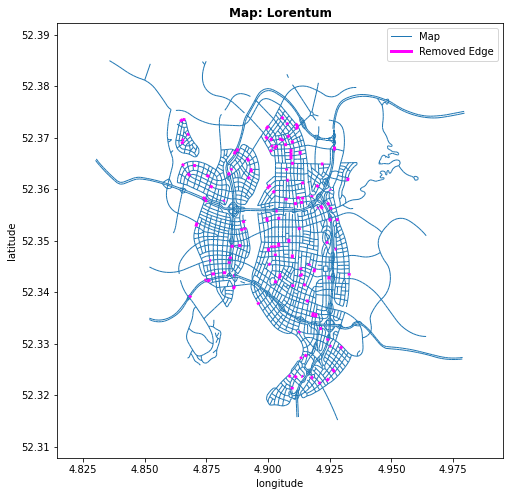

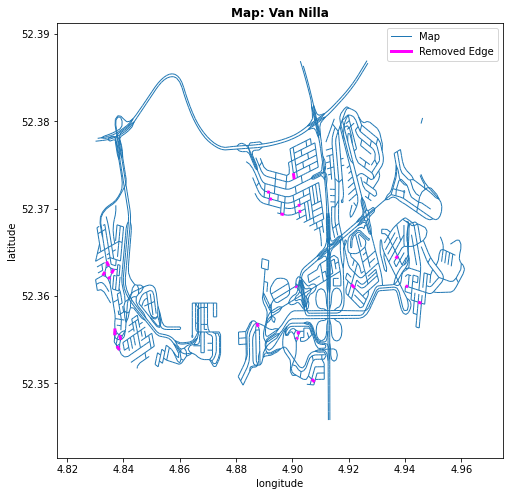

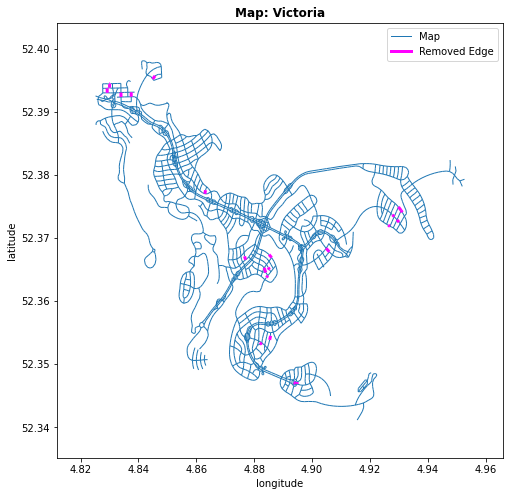

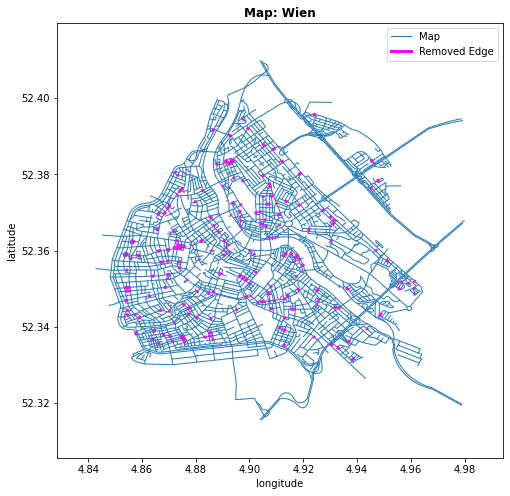

In [46]:
bboxs = [
    (52.315, 52.385, 4.83, 4.98),
    (52.345, 52.387, 4.83, 4.98),
    (52.315, 52.4, 4.825, 4.98),
    (52.315, 52.41, 4.83, 4.98)
]

for i in range(4):
    plot_removedroads_example(map_idx=i, bbox=bboxs[i], savename=os.path.join('./figures', f'map{i}_example'))

### Plotting the actual training and test splits of the datset

Road distance: 114528m, or 114.5km
Removed road distance: 4154m, or 4.2km
Roads removed: 59/1689, ~3.49%
Removed kilometers: 4.2/114.5, ~3.67%
# Trajectories in T: 14959, # Trajectories in T': 2573, Total # Trajectories: 17532
Road distance: 91805m, or 91.8km
Removed road distance: 2327m, or 2.3km
Roads removed: 34/1355, ~2.51%
Removed kilometers: 2.3/91.8, ~2.51%
# Trajectories in T: 37659, # Trajectories in T': 37327, Total # Trajectories: 74986


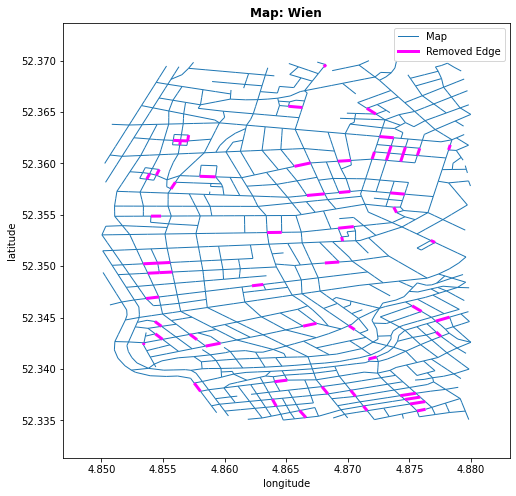

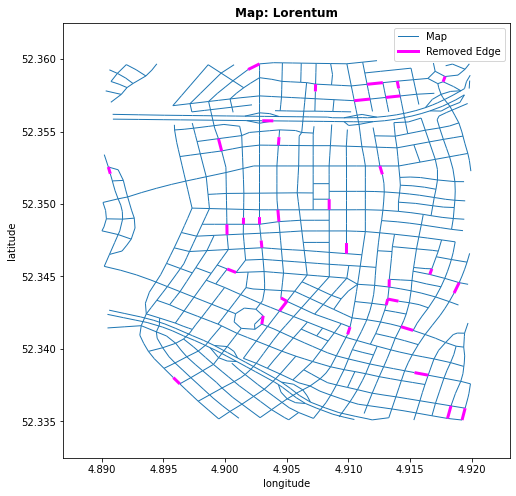

In [4]:
bbox_train = (52.335, 52.36, 4.89, 4.92)
bbox_test = (52.335, 52.37, 4.85, 4.88)

plot_removedroads_example(map_idx=3, bbox=bbox_test, savename=os.path.join('./figures', f'trainpatch'))
plot_removedroads_example(map_idx=0, bbox=bbox_train, savename=os.path.join('./figures', f'testpatch'))

### Plot Dataset Cleaning (Splitting) Results

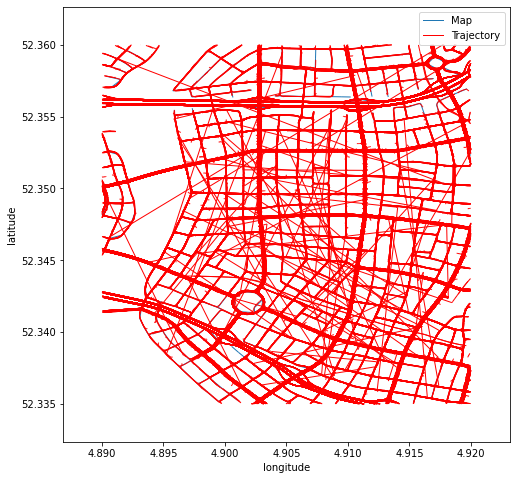

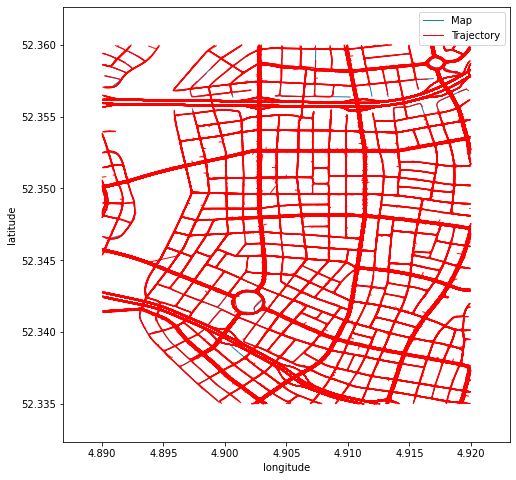

In [68]:
import xml.etree.ElementTree as ET
from datetime import datetime

def parse_trajectories_nosplitting(xml_fname):
    # Read the XML file
    traj_tree = ET.parse(xml_fname)
    traj_root = traj_tree.getroot()
    vehicles = traj_root[0]

    # Create numpy trajectory datatype
    trajectory_dtype = np.dtype([("lat", "f8"), ("lon", "f8"), ("speed", "f4"), 
                            ("x", "f4"), ("y", "f4"), ("z", "f4"),
                            ("heading", "f4"), ("timestamp", "datetime64[s]"), ("gt_segment", "int"),
                            ("path_id", "int"), ("pathpos_idx", "int"), ("vehtype", 'S5')])

    # Convert XML formatted trajectories to list of lists of objects
    trajectories = []
    for vehicle in vehicles:
        if vehicle.attrib['VehicleType'] != 'Car':
            continue

        trajectory = np.zeros(len(vehicle), dtype=trajectory_dtype)
        t_len = 0

        for i, pos in enumerate(vehicle):

            # Check if vehicle type still is consistent
            vehicle_type = pos.attrib['VehicleType']

            # Process current position info
            lat, lon, speed = float(pos.attrib['x']), float(pos.attrib['z']), float(pos.attrib['speed'])
            n1, n2, n3 = float(pos[0].attrib['n1']), float(pos[0].attrib['n2']), float(pos[0].attrib['n3'])
            x, y, z = float(pos[1].attrib['x']), float(pos[1].attrib['y']), float(pos[1].attrib['z']) 
            heading = get_heading(float(pos[1].attrib['z']), float(pos[1].attrib['x']))
            timestamp = datetime.strptime(pos.attrib['timestamp'], "%m/%d/%Y %I:%M:%S %p")
            gt_segment = int(pos[2].attrib['Segment'])
            path_id = int(pos[2].attrib['PathId'])
            pathpos_idx = int(pos[2].attrib['PathPosIdx'])

            # Skip point if it's velocity vector == 0 and heading (xyz) == [0,0,1]
            if [n1,n2,n3] == [0,0,0] and [x,y,z] == [0,0,1]:
                continue

            # Aggregate information into object and append to trajectory
            trajectory[t_len] = lat, lon, speed, x, y, z, heading, timestamp, gt_segment, path_id, pathpos_idx, vehicle_type
            t_len += 1

        # Trim off trajectory to actual length
        trajectory = trajectory[:t_len]
        trajectories.append(trajectory)
        
    # Convert coordinates to wgs84
    trajectories = dataset.to_wgs84(trajectories)

    return trajectories

def plot_dataset_cleaning(xml_fname, bbox, folder):
    # Read in the map
    dataset = SHDataset(noise=False)
    G1 = dataset.read_snapshots(0)[0]
    
    # Read in trajectories w/ and w/o cleaning/splitting
    T1_nosplit = parse_trajectories_nosplitting(xml_fname)
    T1_split = dataset.parse_trajectories(xml_fname)
    
    # Filter 
    G1_bbox,T1_nosplit_bbox,_,_ = filter_bbox_snapshots(G1,{'T':T1_nosplit,'P':None},G1,{'T':T1_nosplit,'P':None}, bbox=bbox)
    _,T1_split_bbox,_,_ = filter_bbox_snapshots(G1,{'T':T1_split,'P':None},G1,{'T':T1_split,'P':None}, bbox=bbox)
    plot_graph(snapshot_to_nxgraph(G1_bbox,T1_nosplit_bbox['T']), savename=os.path.join(folder, 'map_precleaning'), show_img=False)
    plot_graph(snapshot_to_nxgraph(G1_bbox,T1_split_bbox['T']), savename=os.path.join(folder, 'map_postcleaning'), show_img=False)

plot_dataset_cleaning('./dataset/raw_data/Lorentum_1_trajectories_batch0 .xml', bbox_train, folder='./figures')

### Plot dataset snapshots structure

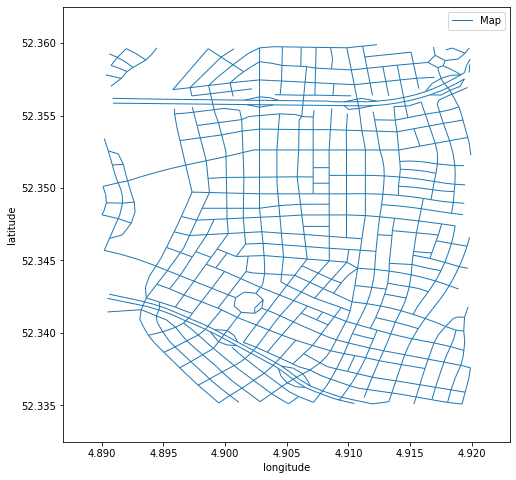

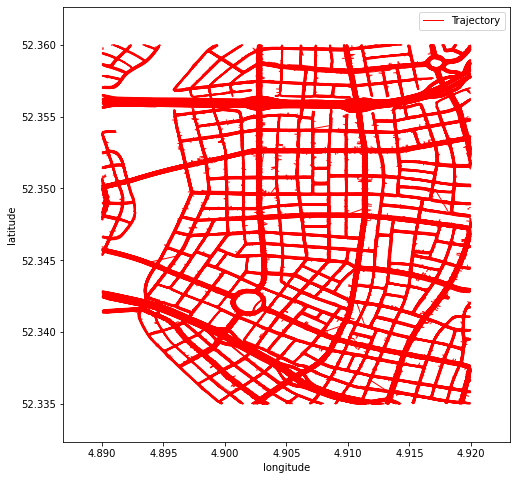

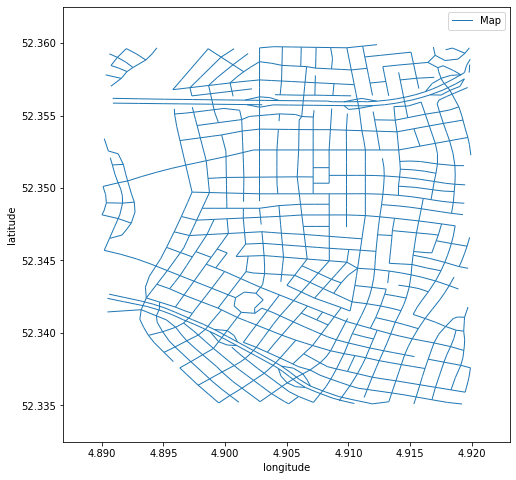

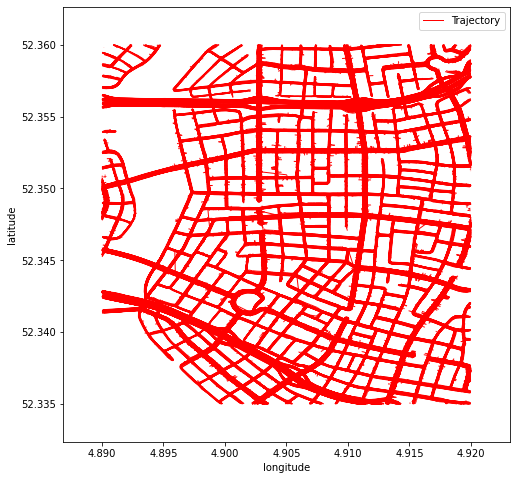

In [4]:
def plot_snapshots(bbox=(52.335, 52.36, 4.89, 4.92)):
    dataset = SHDataset()
    G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)
    plot_graph(G1, savename='./figures/snapshots_ex_G1', show_img=False)
    plot_graph(traj_to_nxgraph(T1['T']), savename='./figures/snapshots_ex_T1', show_img=False)
    plot_graph(G2, savename='./figures/snapshots_ex_G2', show_img=False)
    plot_graph(traj_to_nxgraph(T2['T']), savename='./figures/snapshots_ex_T2', show_img=False)

plot_snapshots()